<a href="https://colab.research.google.com/github/peony1217-ctrl/DL/blob/main/DS6_%EB%89%B4%EC%8A%A4%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D_251209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

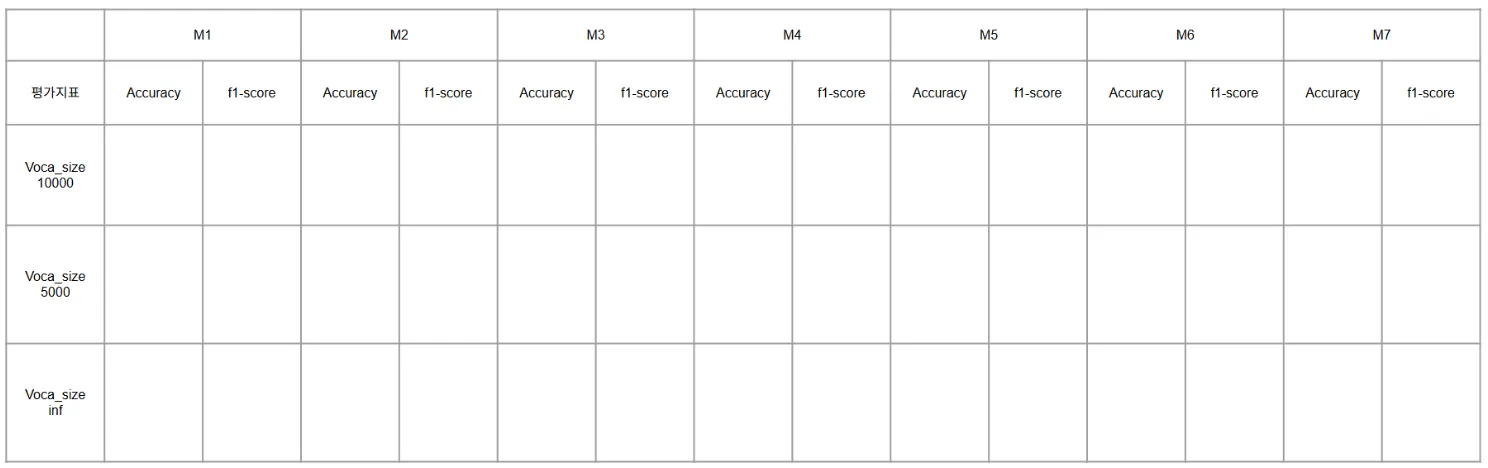

# 회고

제일좋은 모델은 .. 이었다


#오늘 할일
### 실험 또 실험 🤯


1. 단어장 개수를 바꾸면서(10000, 5000, Nan) 8개의 ML모델을 사용해보고  accuacry와 f1-score를 비교
(표로 나타내보세요~) (벡터화는 tf-idf로 통일)

아래 모델은 예시입니다, 여러 모델을 실험해보세요

### 📊 단어장 개수별 ML 모델 성능 비교 (Accuracy / F1-score)

| Vocabulary Size | Model             | Accuracy | F1-Score |
|------------------|------------------|----------|----------|
| 10000            | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |
| 5000             | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |
| NaN (All words)  | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |

2. 딥러닝과 머신런닝의 차이 비교하기
- 딥러닝 모델 1개 Dense를 이용해서 비교해보세요 평가지표 = accuacry, f1-score

In [ ]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 데이터 준비
## index -> text
## DTM , TF-idf 학습데이터 준비

In [ ]:
# 이부분에있는 num_words를 5000과 다른방법으로 바꿔보세요~

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [ ]:
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [ ]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [ ]:
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


In [ ]:
# 벡터화 DTM, TF-idf 방법
dtmvector = CountVectorizer()

tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm= dtmvector.transform(x_test)

x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [ ]:
x_train_tfidf.shape

(8982, 26506)

In [ ]:
x_test_tfidf.shape

(2246, 26506)

In [ ]:
x_train[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely delinquent borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in fmha's financial eligibility standards indicated as many as one half of fmha borrowers who received new loans from the agency in 1986 would be ineligible under the proposed system the agency has proposed evaluating applicants' credit using a variety of financial ratios instead of relying solely on cashflow ability senate agriculture committee chairman patrick leahy d vt slammed the proposed eligibility changes telling fmha administrator vance clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmer

# 모델 정의 및 실험

여러가지 모델을 바꾸며 실험해보세요~

In [ ]:
# TF-idf데이터로 XGBoost 모델 학습하기

# 이친구도 시간좀 걸립니다!

from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# 예측
y_pred = xgb_model.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7939
✅ F1-score : 0.6410


# Dense NN 딥러닝 모델

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, Dense, Dropout


# 아래 Dense의 레이어를 바꿔가며 성능을 확인해봅시다

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

# 샘플 하나의 shape: (26506,)
inputs = Input(shape=(26506,))

x = Dense(512, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(46, activation='softmax')(x)  # 클래스 46개

dense_model = Model(inputs=inputs, outputs=outputs)

dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 26506)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    13,571,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,643,182 (52.04 MB)

 Trainable params: 13,643,182 (52.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 시간이 좀 걸립니다! 한 20분정도..
dense_model.fit(x_train_tfidf, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.5207 - loss: 2.3021 - val_accuracy: 0.7490 - val_loss: 1.0868
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.7998 - loss: 0.8445 - val_accuracy: 0.8024 - val_loss: 0.8961
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 213s 950ms/step - accuracy: 0.8969 - loss: 0.4437 - val_accuracy: 0.8080 - val_loss: 0.8939
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 194s 862ms/step - accuracy: 0.9359 - loss: 0.2523 - val_accuracy: 0.8108 - val_loss: 0.8779
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 160s 710ms/step - accuracy: 0.9575 - loss: 0.1723 - val_accuracy: 0.8052 - val_loss: 0.9285
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 129s 574ms/step - accuracy: 0.9639 - loss: 0.1311 - val_accuracy: 0.8097 - val_loss: 0.9154
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 122s 538ms/step - accuracy: 0.9643 - loss: 0.1191 - val_accuracy: 0.8052 - val_loss: 0.9817
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 112s 492ms/step - accuracy: 0.9626 - loss:

In [ ]:


y_pred_proba = dense_model.predict(x_test_tfidf)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
✅ Accuracy: 0.6839
✅ F1-score: 0.6636


# 나이브 베이즈 분류기 & CNB

라이브러리 로딩 완료!

Reuters 데이터셋 로딩 중...
2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
학습 데이터: 8982, 테스트 데이터: 2246
카테고리 수: 46
550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

데이터를 텍스트로 변환 중...

카테고리 분포:
   Category  Count
0         0     55
1         1    432
2         2     74
3         3   3159
4         4   1949
5         5     17
6         6     48
7         7     16
8         8    139
9         9    101

조건: Top 5,000 단어 사용
실제 Vocabulary Size: 5,000
학습 데이터 shape: (8982, 5000)
테스트 데이터 shape: (2246, 5000)
TF-IDF 변환 중...

[1] Multinomial Naive Bayes
----------------------------------------
Accuracy: 0.7756
F1-Score (weighted): 0.7670

[2] Complement Naive Bayes
----------------------------------------
Accuracy: 0.7685
F1-Score (weighted): 0.7416

[3] Dense Neural Network
----------------------------------------
모델 구조:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,632,110 (10.04 MB)

 Trainable params: 2,632,110 (10.04 MB)

 Non-trainable params: 0 (0.00 B)


모델 학습 중...
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5273 - loss: 2.2784 - val_accuracy: 0.7585 - val_loss: 1.0886
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7923 - loss: 0.8953 - val_accuracy: 0.8047 - val_loss: 0.8719
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8720 - loss: 0.5372 - val_accuracy: 0.8180 - val_loss: 0.8050
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9102 - loss: 0.3506 - val_accuracy: 0.8208 - val_loss: 0.8082
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9410 - loss: 0.2289 - val_accuracy: 0.8191 - val_loss: 0.8520
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9513 - loss: 0.1687 - val_accuracy: 0.8203 - val_loss: 0.8790

Accuracy: 0.7974
F1-Score (weighted): 0.7780


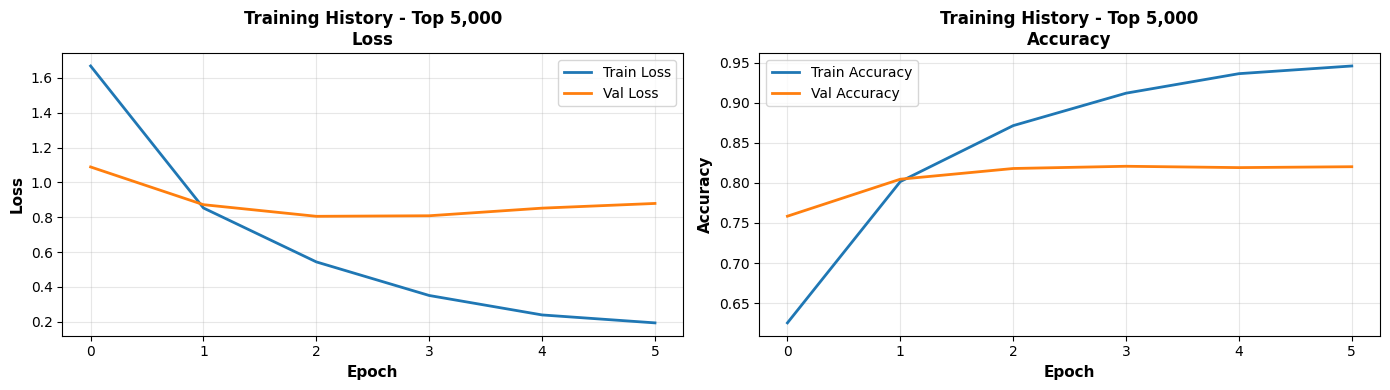


Confusion Matrix 생성 중...


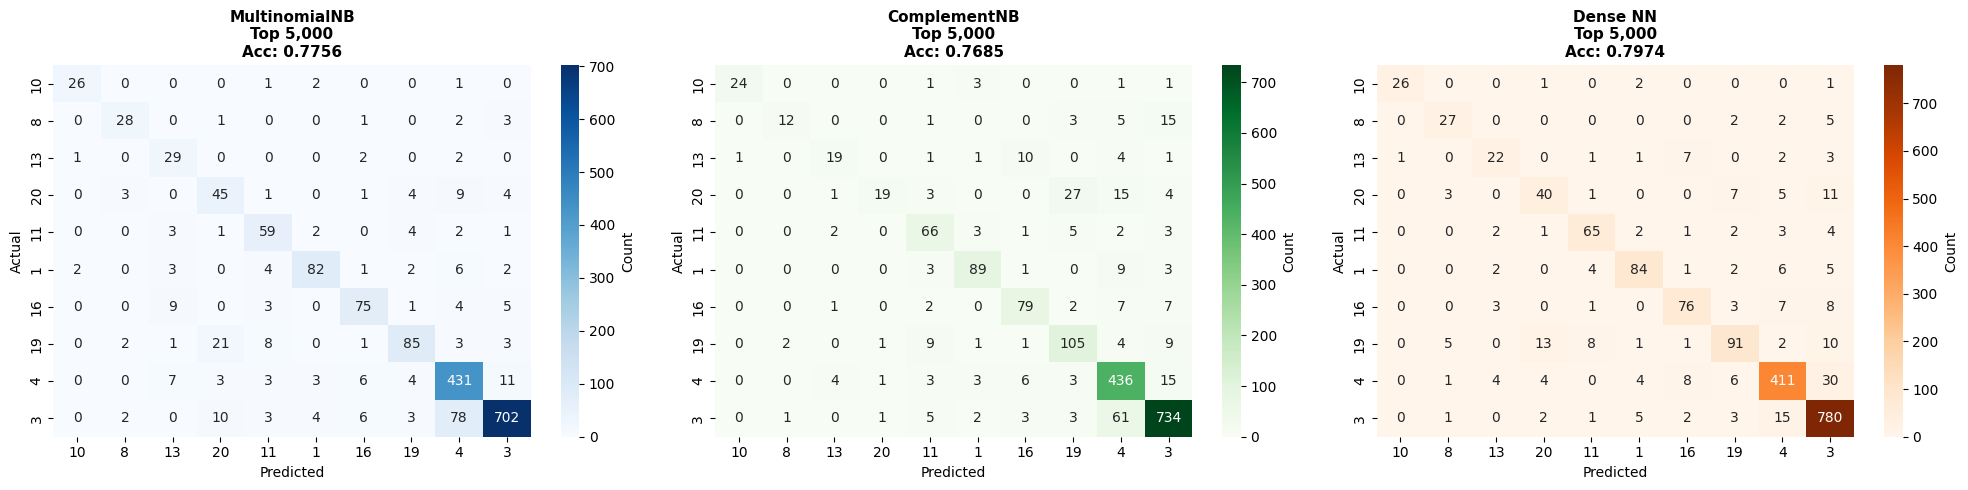


Top 5,000 조건 모델 성능 비교:
  MultinomialNB: Acc=0.7756, F1=0.7670
  ComplementNB:  Acc=0.7685, F1=0.7416
  Dense NN:      Acc=0.7974, F1=0.7780

조건: Top 10,000 단어 사용
실제 Vocabulary Size: 10,000
학습 데이터 shape: (8982, 10000)
테스트 데이터 shape: (2246, 10000)
TF-IDF 변환 중...

[1] Multinomial Naive Bayes
----------------------------------------
Accuracy: 0.7698
F1-Score (weighted): 0.7541

[2] Complement Naive Bayes
----------------------------------------
Accuracy: 0.7792
F1-Score (weighted): 0.7582

[3] Dense Neural Network
----------------------------------------
모델 구조:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,192,110 (19.81 MB)

 Trainable params: 5,192,110 (19.81 MB)

 Non-trainable params: 0 (0.00 B)


모델 학습 중...
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4996 - loss: 2.3085 - val_accuracy: 0.7507 - val_loss: 1.0760
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7917 - loss: 0.8824 - val_accuracy: 0.7969 - val_loss: 0.8708
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8903 - loss: 0.4572 - val_accuracy: 0.8186 - val_loss: 0.8196
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9357 - loss: 0.2657 - val_accuracy: 0.8075 - val_loss: 0.8674
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9530 - loss: 0.1894 - val_accuracy: 0.8169 - val_loss: 0.8827
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9618 - loss: 0.1465 - val_accuracy: 0.8136 - val_loss: 0.9049

Accuracy: 0.8010
F1-Score (weighted): 0.7878


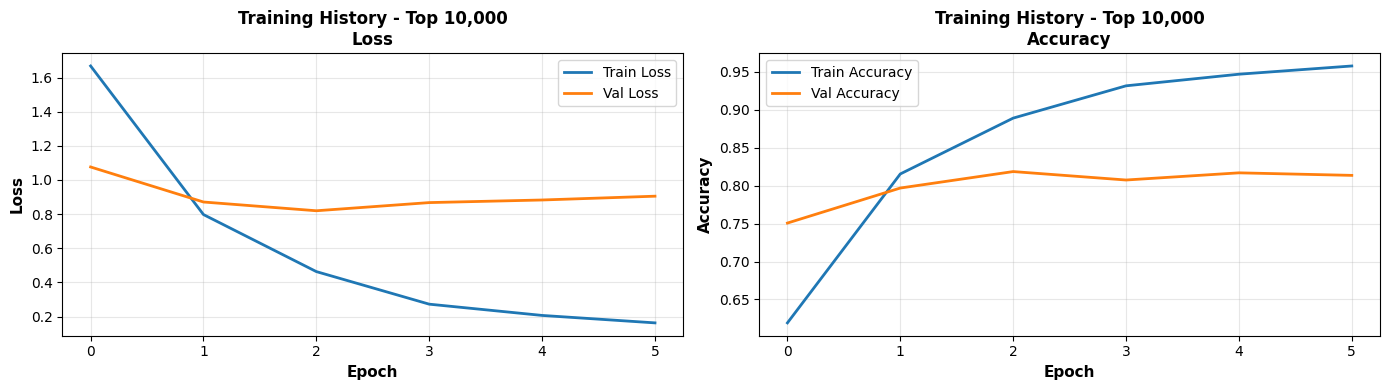


Confusion Matrix 생성 중...


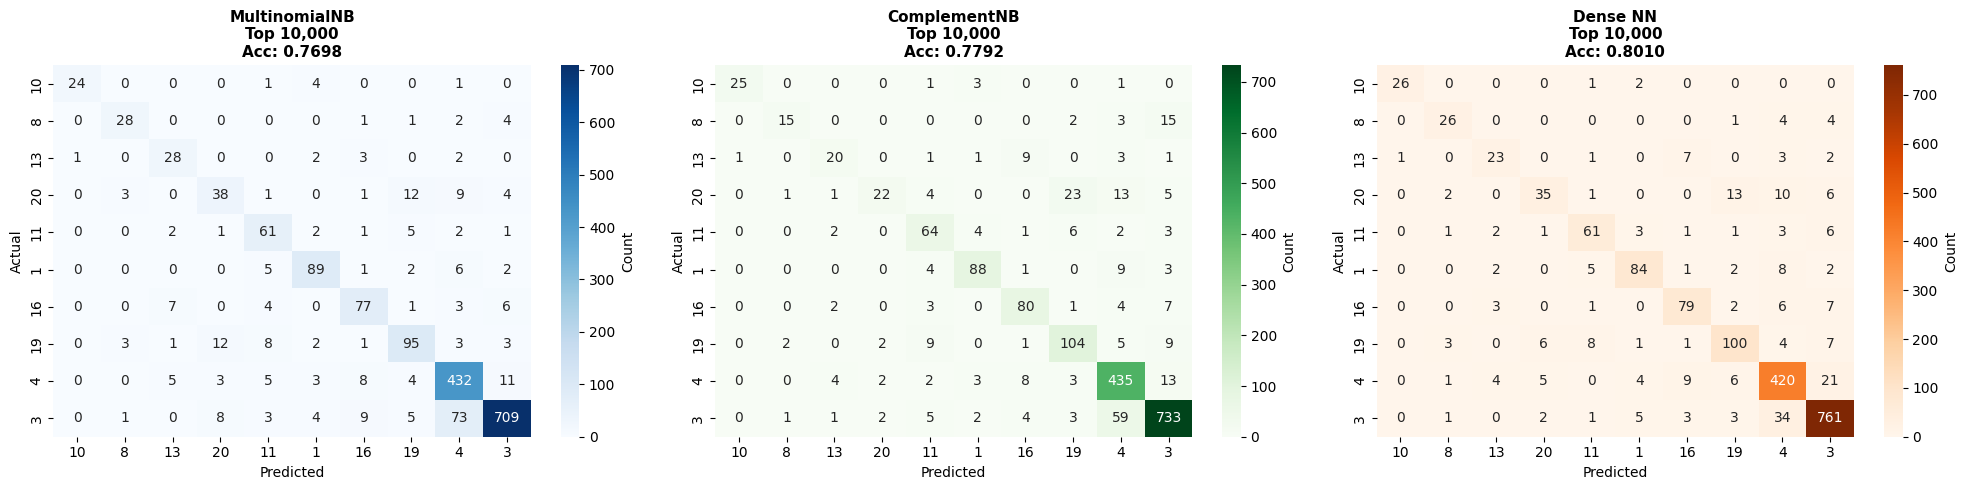


Top 10,000 조건 모델 성능 비교:
  MultinomialNB: Acc=0.7698, F1=0.7541
  ComplementNB:  Acc=0.7792, F1=0.7582
  Dense NN:      Acc=0.8010, F1=0.7878

조건: All words 단어 사용
실제 Vocabulary Size: 26,504
학습 데이터 shape: (8982, 26504)
테스트 데이터 shape: (2246, 26504)
TF-IDF 변환 중...

[1] Multinomial Naive Bayes
----------------------------------------
Accuracy: 0.7248
F1-Score (weighted): 0.6912

[2] Complement Naive Bayes
----------------------------------------
Accuracy: 0.7783
F1-Score (weighted): 0.7573

[3] Dense Neural Network
----------------------------------------
모델 구조:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 26504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    13,570,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,642,158 (52.04 MB)

 Trainable params: 13,642,158 (52.04 MB)

 Non-trainable params: 0 (0.00 B)


모델 학습 중...
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5295 - loss: 2.2988 - val_accuracy: 0.7551 - val_loss: 1.0896
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8056 - loss: 0.8461 - val_accuracy: 0.8041 - val_loss: 0.8703
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9000 - loss: 0.4351 - val_accuracy: 0.8152 - val_loss: 0.8355
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9382 - loss: 0.2436 - val_accuracy: 0.8141 - val_loss: 0.8571
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9512 - loss: 0.1871 - val_accuracy: 0.8114 - val_loss: 0.8867
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9660 - loss: 0.1329 - val_accuracy: 0.8158 - val_loss: 0.8891

Accuracy: 0.8014
F1-Score (weighted): 0.7872


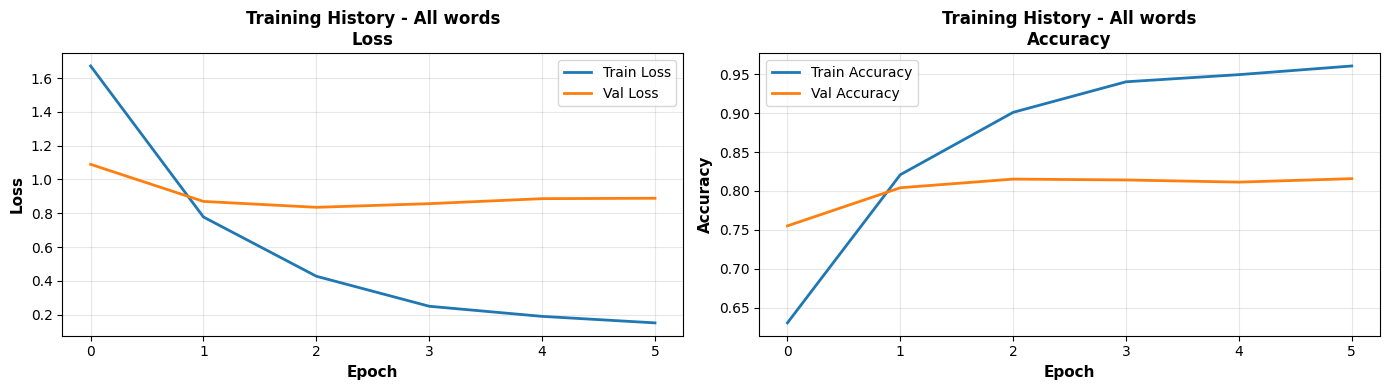


Confusion Matrix 생성 중...


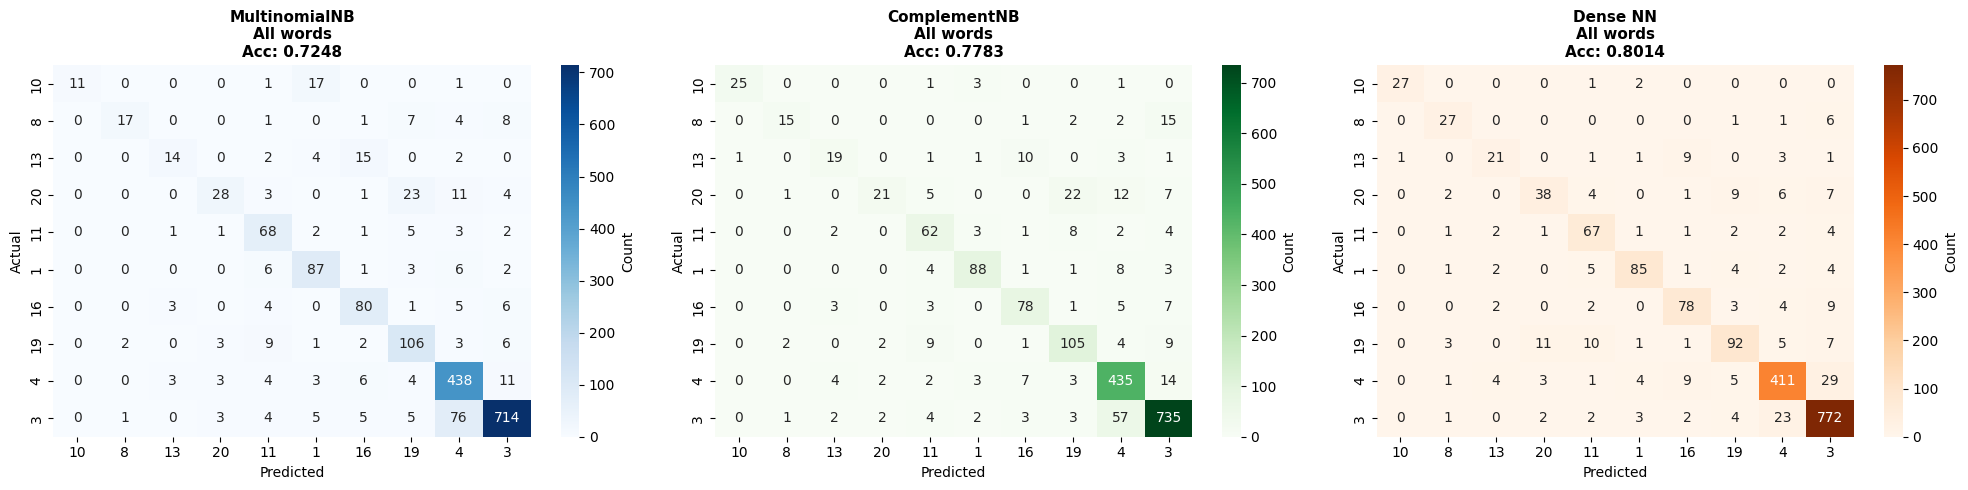


All words 조건 모델 성능 비교:
  MultinomialNB: Acc=0.7248, F1=0.6912
  ComplementNB:  Acc=0.7783, F1=0.7573
  Dense NN:      Acc=0.8014, F1=0.7872

전체 결과 요약
 vocab_size         model  accuracy  precision   recall  f1_score
       5000 MultinomialNB  0.775601   0.784769 0.775601  0.767032
       5000  ComplementNB  0.768477   0.758007 0.768477  0.741593
       5000       DenseNN  0.797418   0.781679 0.797418  0.777952
      10000 MultinomialNB  0.769813   0.771199 0.769813  0.754105
      10000  ComplementNB  0.779163   0.773032 0.779163  0.758164
      10000       DenseNN  0.800980   0.791948 0.800980  0.787806
      26504 MultinomialNB  0.724844   0.718765 0.724844  0.691206
      26504  ComplementNB  0.778272   0.776075 0.778272  0.757284
      26504       DenseNN  0.801425   0.783680 0.801425  0.787160


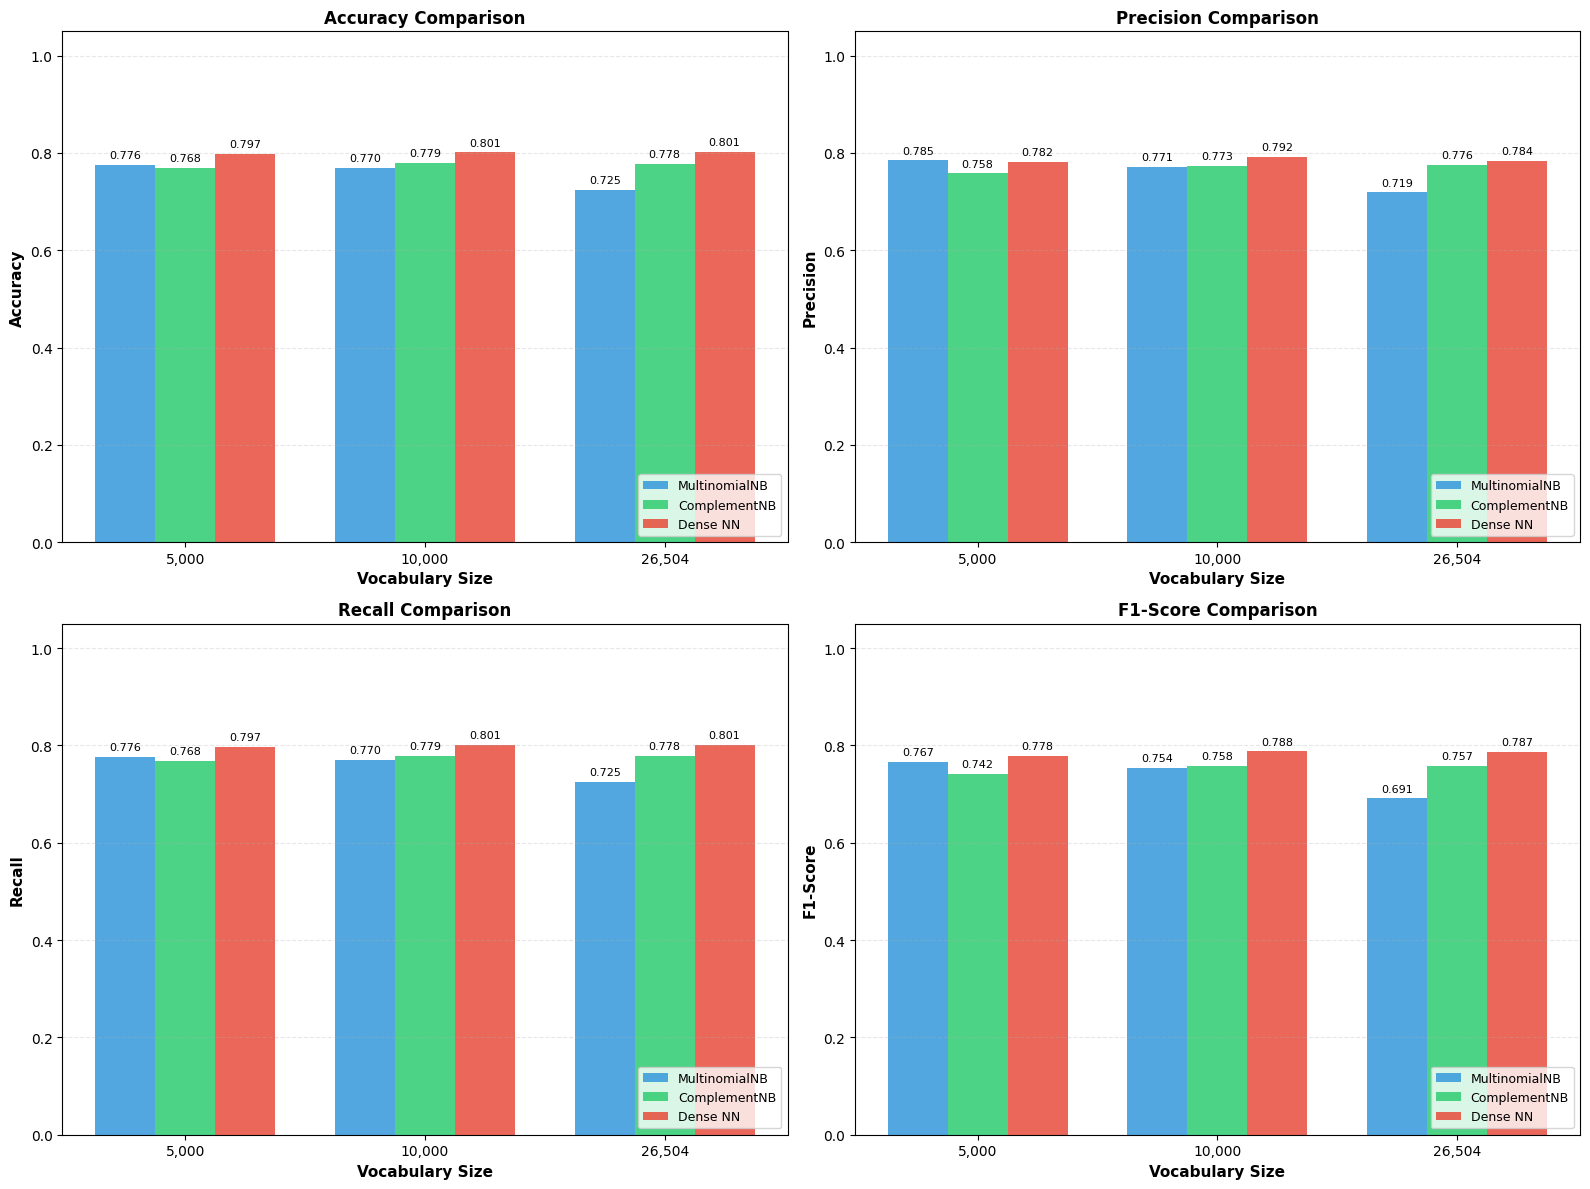


Vocabulary Size에 따른 성능 변화 분석

[MultinomialNB]
----------------------------------------
Vocab Size:   5,000 -> Accuracy: 0.7756, F1-Score: 0.7670
Vocab Size:  10,000 -> Accuracy: 0.7698, F1-Score: 0.7541
Vocab Size:  26,504 -> Accuracy: 0.7248, F1-Score: 0.6912

성능 변화율:
  5,000 → 10,000: Accuracy -0.75%, F1-Score -1.69%
  10,000 → 26,504: Accuracy -5.84%, F1-Score -8.34%

[ComplementNB]
----------------------------------------
Vocab Size:   5,000 -> Accuracy: 0.7685, F1-Score: 0.7416
Vocab Size:  10,000 -> Accuracy: 0.7792, F1-Score: 0.7582
Vocab Size:  26,504 -> Accuracy: 0.7783, F1-Score: 0.7573

성능 변화율:
  5,000 → 10,000: Accuracy +1.39%, F1-Score +2.23%
  10,000 → 26,504: Accuracy -0.11%, F1-Score -0.12%

[DenseNN]
----------------------------------------
Vocab Size:   5,000 -> Accuracy: 0.7974, F1-Score: 0.7780
Vocab Size:  10,000 -> Accuracy: 0.8010, F1-Score: 0.7878
Vocab Size:  26,504 -> Accuracy: 0.8014, F1-Score: 0.7872

성능 변화율:
  5,000 → 10,000: Accuracy +0.45%, F1-Score +1.2

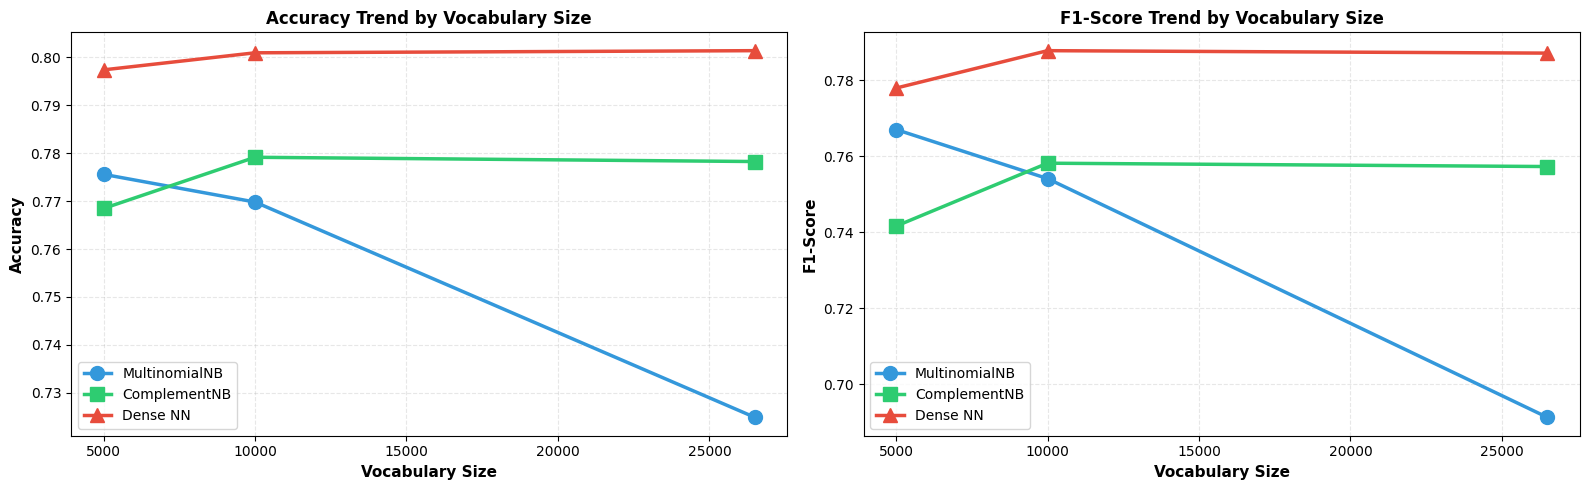


머신러닝 vs 딥러닝 모델 비교 분석

Vocab Size: 5,000
  MultinomialNB - Accuracy: 0.7756, F1: 0.7670
  ComplementNB  - Accuracy: 0.7685, F1: 0.7416
  Dense NN      - Accuracy: 0.7974, F1: 0.7780
  ✓ 최고 성능: Dense NN

Vocab Size: 10,000
  MultinomialNB - Accuracy: 0.7698, F1: 0.7541
  ComplementNB  - Accuracy: 0.7792, F1: 0.7582
  Dense NN      - Accuracy: 0.8010, F1: 0.7878
  ✓ 최고 성능: Dense NN

Vocab Size: 26,504
  MultinomialNB - Accuracy: 0.7248, F1: 0.6912
  ComplementNB  - Accuracy: 0.7783, F1: 0.7573
  Dense NN      - Accuracy: 0.8014, F1: 0.7872
  ✓ 최고 성능: Dense NN

분석 완료!

[생성된 파일]
- all_models_performance_comparison.png
- performance_trend.png


In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import reuters
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Colab 환경)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 로딩 완료!")

# Reuters 데이터셋 로드
print("\nReuters 데이터셋 로딩 중...")
(X_train_seq, y_train), (X_test_seq, y_test) = reuters.load_data(num_words=None, test_split=0.2)

print(f"학습 데이터: {len(X_train_seq)}, 테스트 데이터: {len(X_test_seq)}")
print(f"카테고리 수: {len(np.unique(y_train))}")

num_classes = len(np.unique(y_train))

# 단어 인덱스 가져오기
word_index = reuters.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}

# 시퀀스를 텍스트로 변환하는 함수
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# 모든 데이터를 텍스트로 변환
print("\n데이터를 텍스트로 변환 중...")
X_train_text = [decode_review(seq) for seq in X_train_seq]
X_test_text = [decode_review(seq) for seq in X_test_seq]

# 카테고리 분포 확인
print("\n카테고리 분포:")
unique, counts = np.unique(y_train, return_counts=True)
category_dist = pd.DataFrame({'Category': unique, 'Count': counts})
print(category_dist.head(10))

# 결과 저장을 위한 딕셔너리
results = {
    'vocab_size': [],
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

# 세 가지 Vocabulary Size 조건
vocab_conditions = [
    ('Top 5,000', 5000),
    ('Top 10,000', 10000),
    ('All words', None)
]

# Dense NN 모델 생성 함수 (Functional API)
def create_dense_model(input_dim, num_classes):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(512, activation='relu')(inputs)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# 각 조건별로 모델 학습 및 평가
for condition_name, max_features in vocab_conditions:
    print("\n" + "="*80)
    print(f"조건: {condition_name} 단어 사용")
    print("="*80)

    # CountVectorizer 생성
    vectorizer = CountVectorizer(max_features=max_features)

    # 벡터화
    X_train_counts = vectorizer.fit_transform(X_train_text)
    X_test_counts = vectorizer.transform(X_test_text)

    actual_vocab_size = len(vectorizer.vocabulary_)
    print(f"실제 Vocabulary Size: {actual_vocab_size:,}")
    print(f"학습 데이터 shape: {X_train_counts.shape}")
    print(f"테스트 데이터 shape: {X_test_counts.shape}")

    # TF-IDF 변환 (Dense NN용)
    print("TF-IDF 변환 중...")
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    X_test_tfidf = tfidf_transformer.transform(X_test_counts)

    # Dense NN을 위해 dense array로 변환
    X_train_dense = X_train_tfidf.toarray()
    X_test_dense = X_test_tfidf.toarray()

    # ===== 1. Multinomial Naive Bayes =====
    print("\n[1] Multinomial Naive Bayes")
    print("-" * 40)
    mnb = MultinomialNB()
    mnb.fit(X_train_counts, y_train)
    y_pred_mnb = mnb.predict(X_test_counts)

    acc_mnb = accuracy_score(y_test, y_pred_mnb)
    f1_mnb = f1_score(y_test, y_pred_mnb, average='weighted')
    print(f"Accuracy: {acc_mnb:.4f}")
    print(f"F1-Score (weighted): {f1_mnb:.4f}")

    report_mnb = classification_report(y_test, y_pred_mnb, output_dict=True, zero_division=0)

    # 결과 저장
    results['vocab_size'].append(actual_vocab_size)
    results['model'].append('MultinomialNB')
    results['accuracy'].append(acc_mnb)
    results['precision'].append(report_mnb['weighted avg']['precision'])
    results['recall'].append(report_mnb['weighted avg']['recall'])
    results['f1_score'].append(report_mnb['weighted avg']['f1-score'])

    # ===== 2. Complement Naive Bayes =====
    print("\n[2] Complement Naive Bayes")
    print("-" * 40)
    cnb = ComplementNB()
    cnb.fit(X_train_counts, y_train)
    y_pred_cnb = cnb.predict(X_test_counts)

    acc_cnb = accuracy_score(y_test, y_pred_cnb)
    f1_cnb = f1_score(y_test, y_pred_cnb, average='weighted')
    print(f"Accuracy: {acc_cnb:.4f}")
    print(f"F1-Score (weighted): {f1_cnb:.4f}")

    report_cnb = classification_report(y_test, y_pred_cnb, output_dict=True, zero_division=0)

    # 결과 저장
    results['vocab_size'].append(actual_vocab_size)
    results['model'].append('ComplementNB')
    results['accuracy'].append(acc_cnb)
    results['precision'].append(report_cnb['weighted avg']['precision'])
    results['recall'].append(report_cnb['weighted avg']['recall'])
    results['f1_score'].append(report_cnb['weighted avg']['f1-score'])

    # ===== 3. Dense Neural Network =====
    print("\n[3] Dense Neural Network")
    print("-" * 40)

    # 모델 생성
    dense_model = create_dense_model(actual_vocab_size, num_classes)
    print(f"모델 구조:")
    dense_model.summary()

    # Early Stopping 설정
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # 모델 학습
    print("\n모델 학습 중...")
    history = dense_model.fit(
        X_train_dense, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # 예측
    y_pred_dense_probs = dense_model.predict(X_test_dense, verbose=0)
    y_pred_dense = np.argmax(y_pred_dense_probs, axis=1)

    acc_dense = accuracy_score(y_test, y_pred_dense)
    f1_dense = f1_score(y_test, y_pred_dense, average='weighted')
    print(f"\nAccuracy: {acc_dense:.4f}")
    print(f"F1-Score (weighted): {f1_dense:.4f}")

    report_dense = classification_report(y_test, y_pred_dense, output_dict=True, zero_division=0)

    # 결과 저장
    results['vocab_size'].append(actual_vocab_size)
    results['model'].append('DenseNN')
    results['accuracy'].append(acc_dense)
    results['precision'].append(report_dense['weighted avg']['precision'])
    results['recall'].append(report_dense['weighted avg']['recall'])
    results['f1_score'].append(report_dense['weighted avg']['f1-score'])

    # 학습 곡선 시각화
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Loss
    axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Loss', fontsize=11, fontweight='bold')
    axes[0].set_title(f'Training History - {condition_name}\nLoss', fontsize=12, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Accuracy
    axes[1].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    axes[1].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
    axes[1].set_xlabel('Epoch', fontsize=11, fontweight='bold')
    axes[1].set_ylabel('Accuracy', fontsize=11, fontweight='bold')
    axes[1].set_title(f'Training History - {condition_name}\nAccuracy', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Confusion Matrix 비교 (상위 10개 카테고리)
    print("\nConfusion Matrix 생성 중...")
    top_10_cats = unique[np.argsort(counts)[-10:]]
    mask_test = np.isin(y_test, top_10_cats)

    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    # MultinomialNB
    y_test_filtered = y_test[mask_test]
    y_pred_mnb_filtered = y_pred_mnb[mask_test]
    cm_mnb = confusion_matrix(y_test_filtered, y_pred_mnb_filtered, labels=top_10_cats)
    sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=top_10_cats, yticklabels=top_10_cats, cbar_kws={'label': 'Count'})
    axes[0].set_title(f'MultinomialNB\n{condition_name}\nAcc: {acc_mnb:.4f}', fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Actual', fontsize=10)
    axes[0].set_xlabel('Predicted', fontsize=10)

    # ComplementNB
    y_pred_cnb_filtered = y_pred_cnb[mask_test]
    cm_cnb = confusion_matrix(y_test_filtered, y_pred_cnb_filtered, labels=top_10_cats)
    sns.heatmap(cm_cnb, annot=True, fmt='d', cmap='Greens', ax=axes[1],
                xticklabels=top_10_cats, yticklabels=top_10_cats, cbar_kws={'label': 'Count'})
    axes[1].set_title(f'ComplementNB\n{condition_name}\nAcc: {acc_cnb:.4f}', fontsize=11, fontweight='bold')
    axes[1].set_ylabel('Actual', fontsize=10)
    axes[1].set_xlabel('Predicted', fontsize=10)

    # DenseNN
    y_pred_dense_filtered = y_pred_dense[mask_test]
    cm_dense = confusion_matrix(y_test_filtered, y_pred_dense_filtered, labels=top_10_cats)
    sns.heatmap(cm_dense, annot=True, fmt='d', cmap='Oranges', ax=axes[2],
                xticklabels=top_10_cats, yticklabels=top_10_cats, cbar_kws={'label': 'Count'})
    axes[2].set_title(f'Dense NN\n{condition_name}\nAcc: {acc_dense:.4f}', fontsize=11, fontweight='bold')
    axes[2].set_ylabel('Actual', fontsize=10)
    axes[2].set_xlabel('Predicted', fontsize=10)

    plt.tight_layout()
    plt.show()

    # 현재 조건의 모델 비교
    print(f"\n{condition_name} 조건 모델 성능 비교:")
    print(f"  MultinomialNB: Acc={acc_mnb:.4f}, F1={f1_mnb:.4f}")
    print(f"  ComplementNB:  Acc={acc_cnb:.4f}, F1={f1_cnb:.4f}")
    print(f"  Dense NN:      Acc={acc_dense:.4f}, F1={f1_dense:.4f}")

# 결과 DataFrame 생성
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("전체 결과 요약")
print("="*80)
print(results_df.to_string(index=False))

# 성능 비교 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
    ax = axes[idx // 2, idx % 2]

    # 각 모델 데이터
    mnb_data = results_df[results_df['model'] == 'MultinomialNB'].sort_values('vocab_size')
    cnb_data = results_df[results_df['model'] == 'ComplementNB'].sort_values('vocab_size')
    dense_data = results_df[results_df['model'] == 'DenseNN'].sort_values('vocab_size')

    x = np.arange(len(mnb_data))
    width = 0.25

    bars1 = ax.bar(x - width, mnb_data[metric].values, width,
                   label='MultinomialNB', alpha=0.85, color='#3498db')
    bars2 = ax.bar(x, cnb_data[metric].values, width,
                   label='ComplementNB', alpha=0.85, color='#2ecc71')
    bars3 = ax.bar(x + width, dense_data[metric].values, width,
                   label='Dense NN', alpha=0.85, color='#e74c3c')

    ax.set_xlabel('Vocabulary Size', fontsize=11, fontweight='bold')
    ax.set_ylabel(metric_name, fontsize=11, fontweight='bold')
    ax.set_title(f'{metric_name} Comparison', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([f'{int(v):,}' for v in mnb_data['vocab_size'].values], rotation=0)
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim([0, 1.05])

    # 값 표시
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}',
                   ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('all_models_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Vocabulary Size에 따른 성능 변화 추이 분석
print("\n" + "="*80)
print("Vocabulary Size에 따른 성능 변화 분석")
print("="*80)

for model_name in ['MultinomialNB', 'ComplementNB', 'DenseNN']:
    model_data = results_df[results_df['model'] == model_name].sort_values('vocab_size')
    print(f"\n[{model_name}]")
    print("-" * 40)

    vocab_sizes = model_data['vocab_size'].values
    accuracies = model_data['accuracy'].values
    f1_scores = model_data['f1_score'].values

    for i in range(len(vocab_sizes)):
        print(f"Vocab Size: {vocab_sizes[i]:>7,} -> Accuracy: {accuracies[i]:.4f}, F1-Score: {f1_scores[i]:.4f}")

    if len(accuracies) > 1:
        print(f"\n성능 변화율:")
        for i in range(1, len(accuracies)):
            acc_change = ((accuracies[i] - accuracies[i-1]) / accuracies[i-1] * 100)
            f1_change = ((f1_scores[i] - f1_scores[i-1]) / f1_scores[i-1] * 100)
            print(f"  {vocab_sizes[i-1]:,} → {vocab_sizes[i]:,}: "
                  f"Accuracy {acc_change:+.2f}%, F1-Score {f1_change:+.2f}%")

# 성능 추이 그래프
print("\n성능 추이 그래프 생성 중...")
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

mnb_data = results_df[results_df['model'] == 'MultinomialNB'].sort_values('vocab_size')
cnb_data = results_df[results_df['model'] == 'ComplementNB'].sort_values('vocab_size')
dense_data = results_df[results_df['model'] == 'DenseNN'].sort_values('vocab_size')

# Accuracy 추이
axes[0].plot(mnb_data['vocab_size'], mnb_data['accuracy'],
             marker='o', linewidth=2.5, markersize=10, label='MultinomialNB', color='#3498db')
axes[0].plot(cnb_data['vocab_size'], cnb_data['accuracy'],
             marker='s', linewidth=2.5, markersize=10, label='ComplementNB', color='#2ecc71')
axes[0].plot(dense_data['vocab_size'], dense_data['accuracy'],
             marker='^', linewidth=2.5, markersize=10, label='Dense NN', color='#e74c3c')
axes[0].set_xlabel('Vocabulary Size', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=11, fontweight='bold')
axes[0].set_title('Accuracy Trend by Vocabulary Size', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')

# F1-Score 추이
axes[1].plot(mnb_data['vocab_size'], mnb_data['f1_score'],
             marker='o', linewidth=2.5, markersize=10, label='MultinomialNB', color='#3498db')
axes[1].plot(cnb_data['vocab_size'], cnb_data['f1_score'],
             marker='s', linewidth=2.5, markersize=10, label='ComplementNB', color='#2ecc71')
axes[1].plot(dense_data['vocab_size'], dense_data['f1_score'],
             marker='^', linewidth=2.5, markersize=10, label='Dense NN', color='#e74c3c')
axes[1].set_xlabel('Vocabulary Size', fontsize=11, fontweight='bold')
axes[1].set_ylabel('F1-Score', fontsize=11, fontweight='bold')
axes[1].set_title('F1-Score Trend by Vocabulary Size', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('performance_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# 모델 간 비교 분석
print("\n" + "="*80)
print("머신러닝 vs 딥러닝 모델 비교 분석")
print("="*80)

for i in range(0, len(results_df), 3):
    mnb_row = results_df.iloc[i]
    cnb_row = results_df.iloc[i+1]
    dense_row = results_df.iloc[i+2]

    print(f"\nVocab Size: {int(mnb_row['vocab_size']):,}")
    print(f"  MultinomialNB - Accuracy: {mnb_row['accuracy']:.4f}, F1: {mnb_row['f1_score']:.4f}")
    print(f"  ComplementNB  - Accuracy: {cnb_row['accuracy']:.4f}, F1: {cnb_row['f1_score']:.4f}")
    print(f"  Dense NN      - Accuracy: {dense_row['accuracy']:.4f}, F1: {dense_row['f1_score']:.4f}")

    # 최고 성능 모델
    best_acc_idx = np.argmax([mnb_row['accuracy'], cnb_row['accuracy'], dense_row['accuracy']])
    best_model = ['MultinomialNB', 'ComplementNB', 'Dense NN'][best_acc_idx]
    print(f"  ✓ 최고 성능: {best_model}")

print("\n" + "="*80)
print("분석 완료!")
print("="*80)
print("\n[생성된 파일]")
print("- all_models_performance_comparison.png")
print("- performance_trend.png")

# LGBM

라이브러리 로딩 완료!
LightGBM 버전: 4.6.0

Reuters 데이터셋 로딩 중...
학습 데이터: 8982, 테스트 데이터: 2246
카테고리 수: 46

데이터를 텍스트로 변환 중...

카테고리 분포:
   Category  Count
0         0     55
1         1    432
2         2     74
3         3   3159
4         4   1949
5         5     17
6         6     48
7         7     16
8         8    139
9         9    101

조건: Top 5,000 단어 사용 - LightGBM
실제 Vocabulary Size: 5,000
학습 데이터 shape: (8982, 5000)
테스트 데이터 shape: (2246, 5000)
데이터 타입: float32

LightGBM 모델 학습 중...

학습 완료! (소요 시간: 21.87초)
Best iteration: 56

✅ Accuracy: 0.8237
✅ F1-Score (weighted): 0.8160

Classification Report (상위 5개 카테고리):
  Category 1: precision=0.735, recall=0.819, f1=0.775
  Category 16: precision=0.733, recall=0.778, f1=0.755
  Category 19: precision=0.714, recall=0.714, f1=0.714
  Category 4: precision=0.823, recall=0.890, f1=0.855
  Category 3: precision=0.921, recall=0.945, f1=0.933

Feature Importance 계산 중...


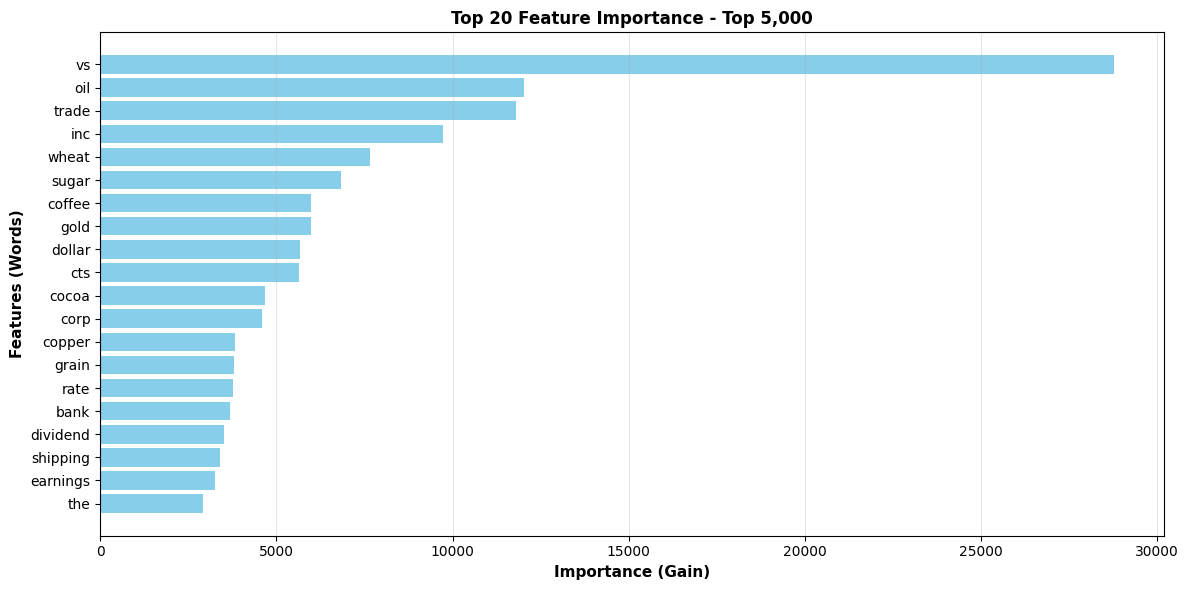


Confusion Matrix 생성 중...


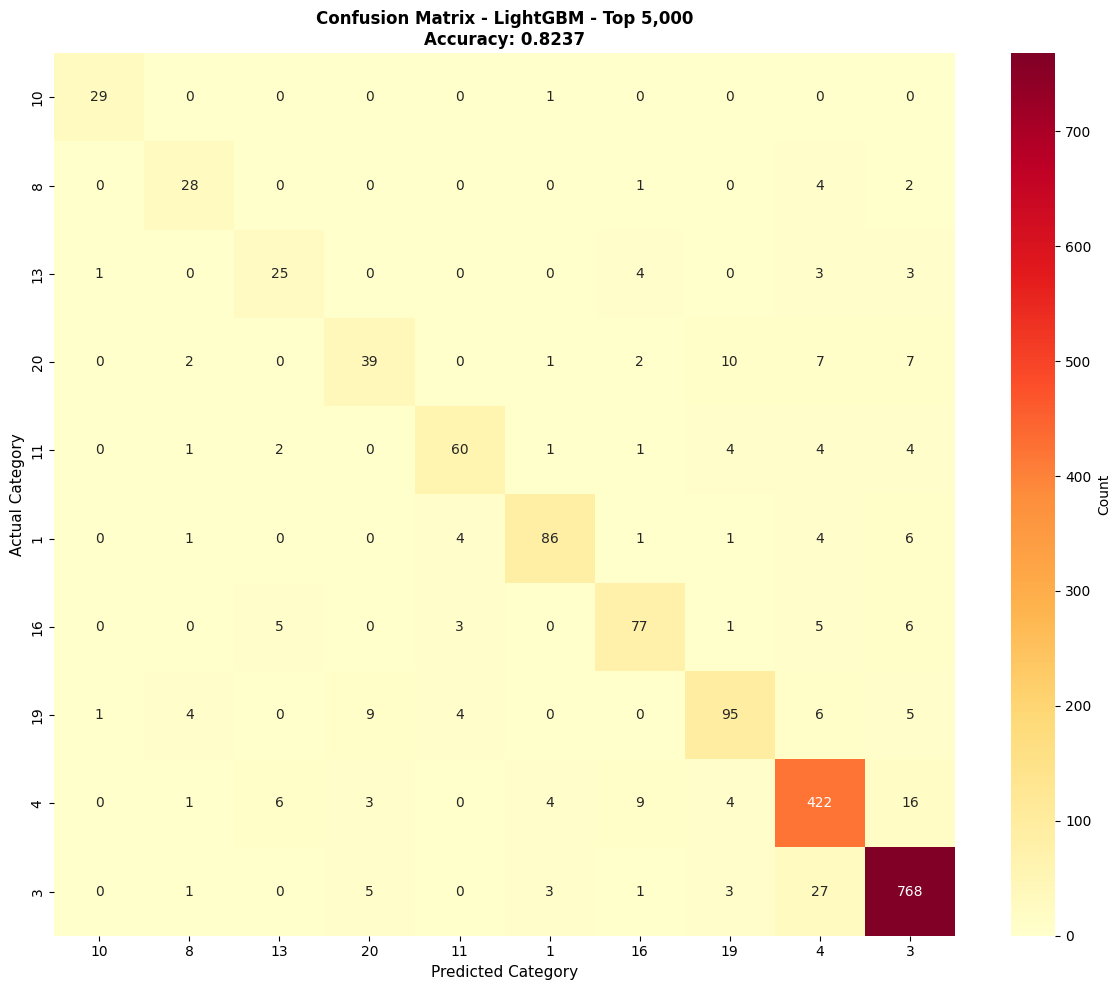


조건: Top 10,000 단어 사용 - LightGBM
실제 Vocabulary Size: 10,000
학습 데이터 shape: (8982, 10000)
테스트 데이터 shape: (2246, 10000)
데이터 타입: float32

LightGBM 모델 학습 중...

학습 완료! (소요 시간: 21.06초)
Best iteration: 56

✅ Accuracy: 0.8237
✅ F1-Score (weighted): 0.8160

Classification Report (상위 5개 카테고리):
  Category 1: precision=0.735, recall=0.819, f1=0.775
  Category 16: precision=0.733, recall=0.778, f1=0.755
  Category 19: precision=0.714, recall=0.714, f1=0.714
  Category 4: precision=0.823, recall=0.890, f1=0.855
  Category 3: precision=0.921, recall=0.945, f1=0.933

Feature Importance 계산 중...


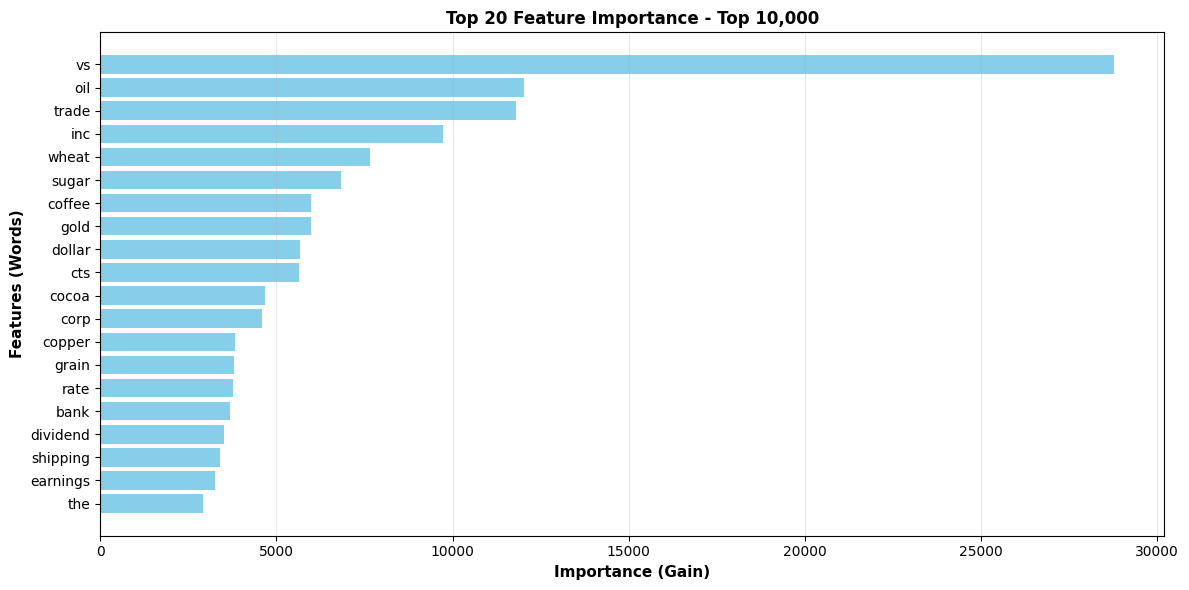


Confusion Matrix 생성 중...


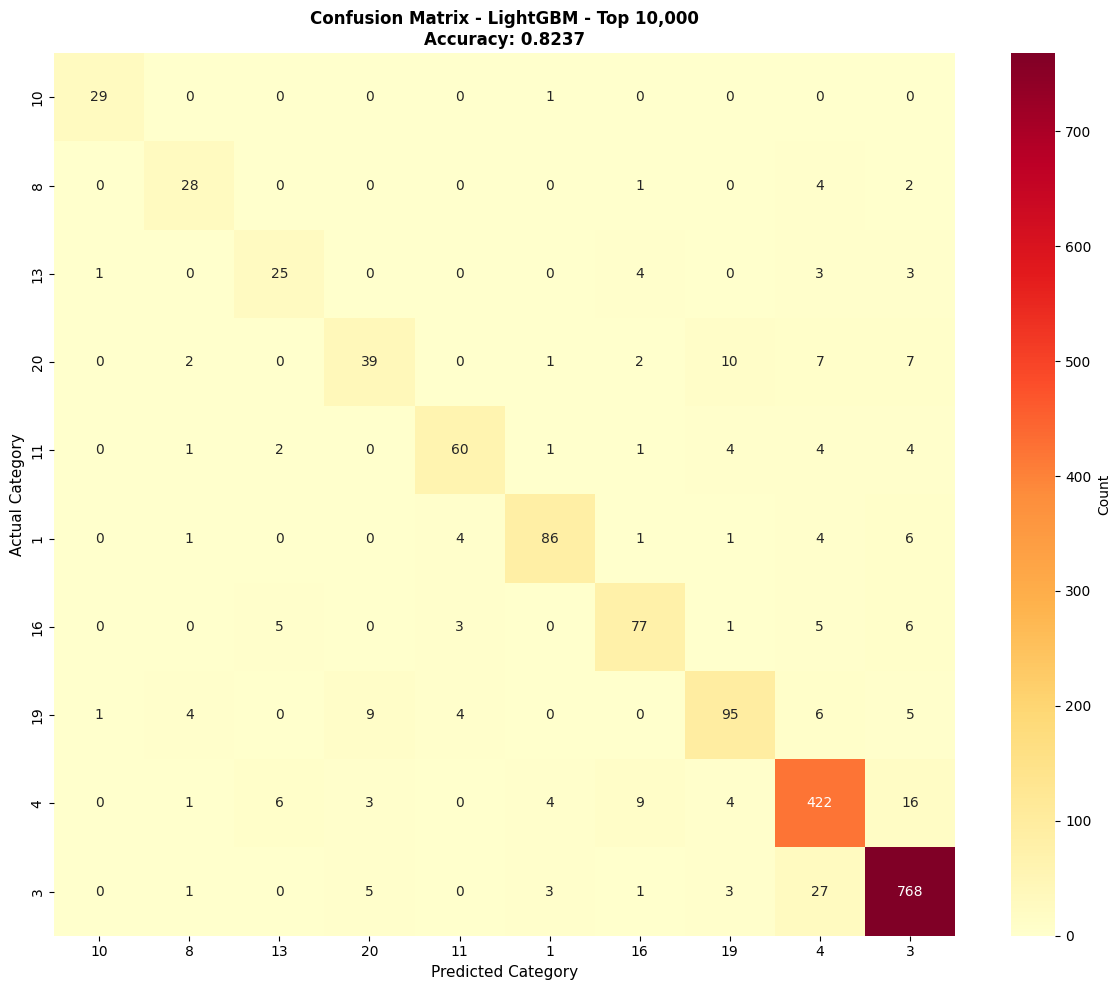


조건: All words 단어 사용 - LightGBM
실제 Vocabulary Size: 26,504
학습 데이터 shape: (8982, 26504)
테스트 데이터 shape: (2246, 26504)
데이터 타입: float32

LightGBM 모델 학습 중...

학습 완료! (소요 시간: 21.56초)
Best iteration: 56

✅ Accuracy: 0.8237
✅ F1-Score (weighted): 0.8160

Classification Report (상위 5개 카테고리):
  Category 1: precision=0.735, recall=0.819, f1=0.775
  Category 16: precision=0.733, recall=0.778, f1=0.755
  Category 19: precision=0.714, recall=0.714, f1=0.714
  Category 4: precision=0.823, recall=0.890, f1=0.855
  Category 3: precision=0.921, recall=0.945, f1=0.933

Feature Importance 계산 중...


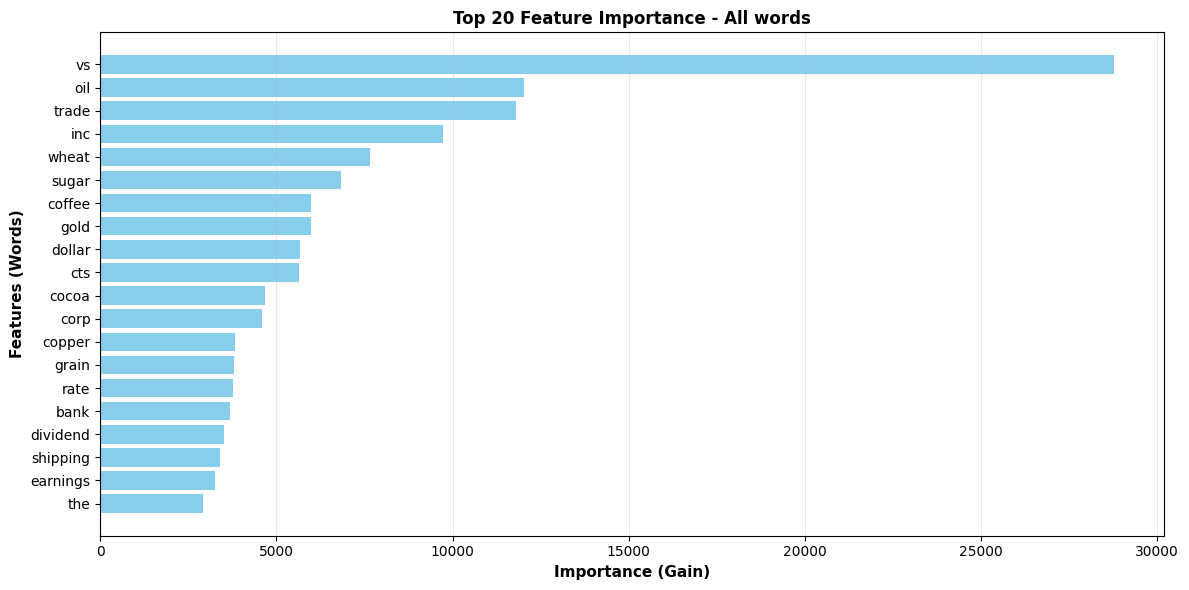


Confusion Matrix 생성 중...


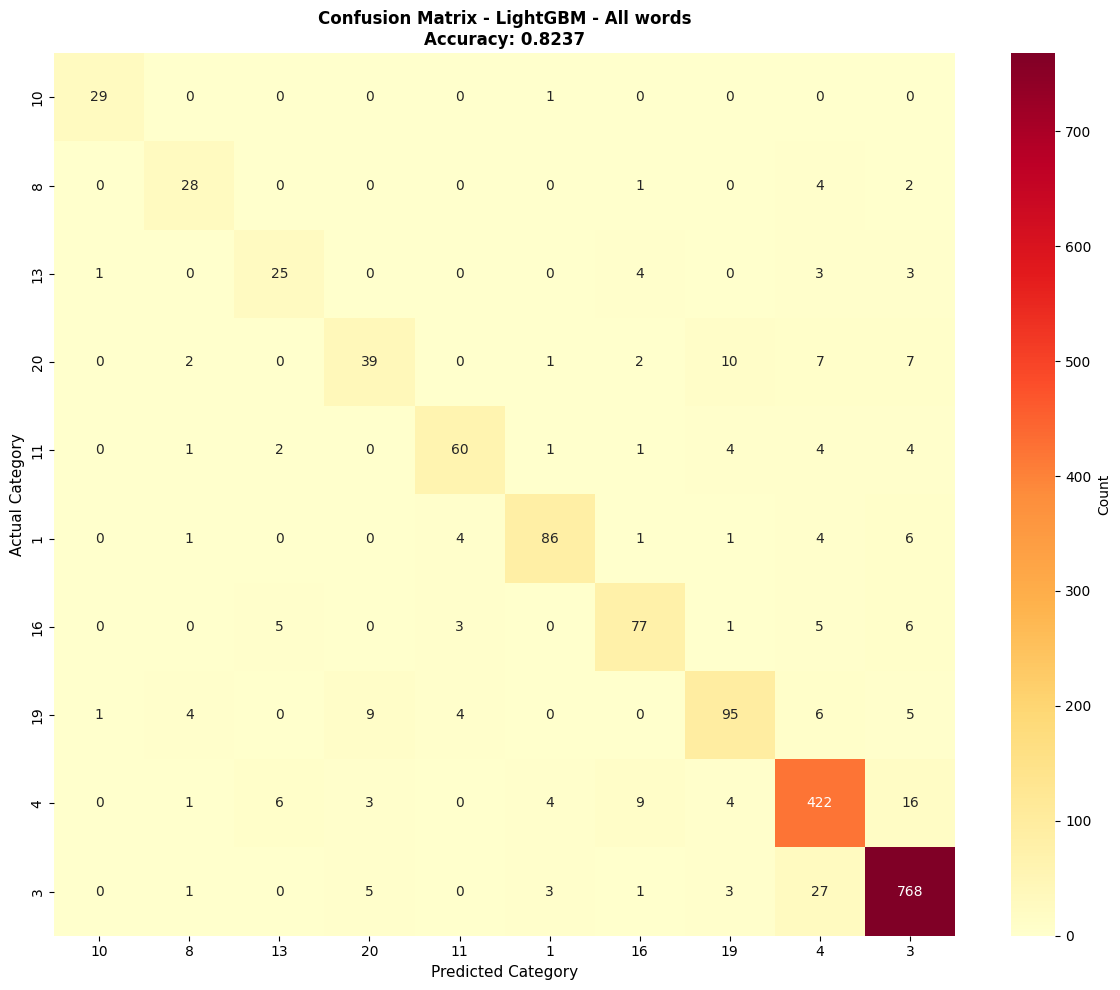


전체 결과 요약 - LightGBM
 vocab_size  accuracy  precision   recall  f1_score  training_time
       5000  0.823687   0.819432 0.823687  0.815982      21.868888
      10000  0.823687   0.819432 0.823687  0.815982      21.056539
      26504  0.823687   0.819432 0.823687  0.815982      21.558068


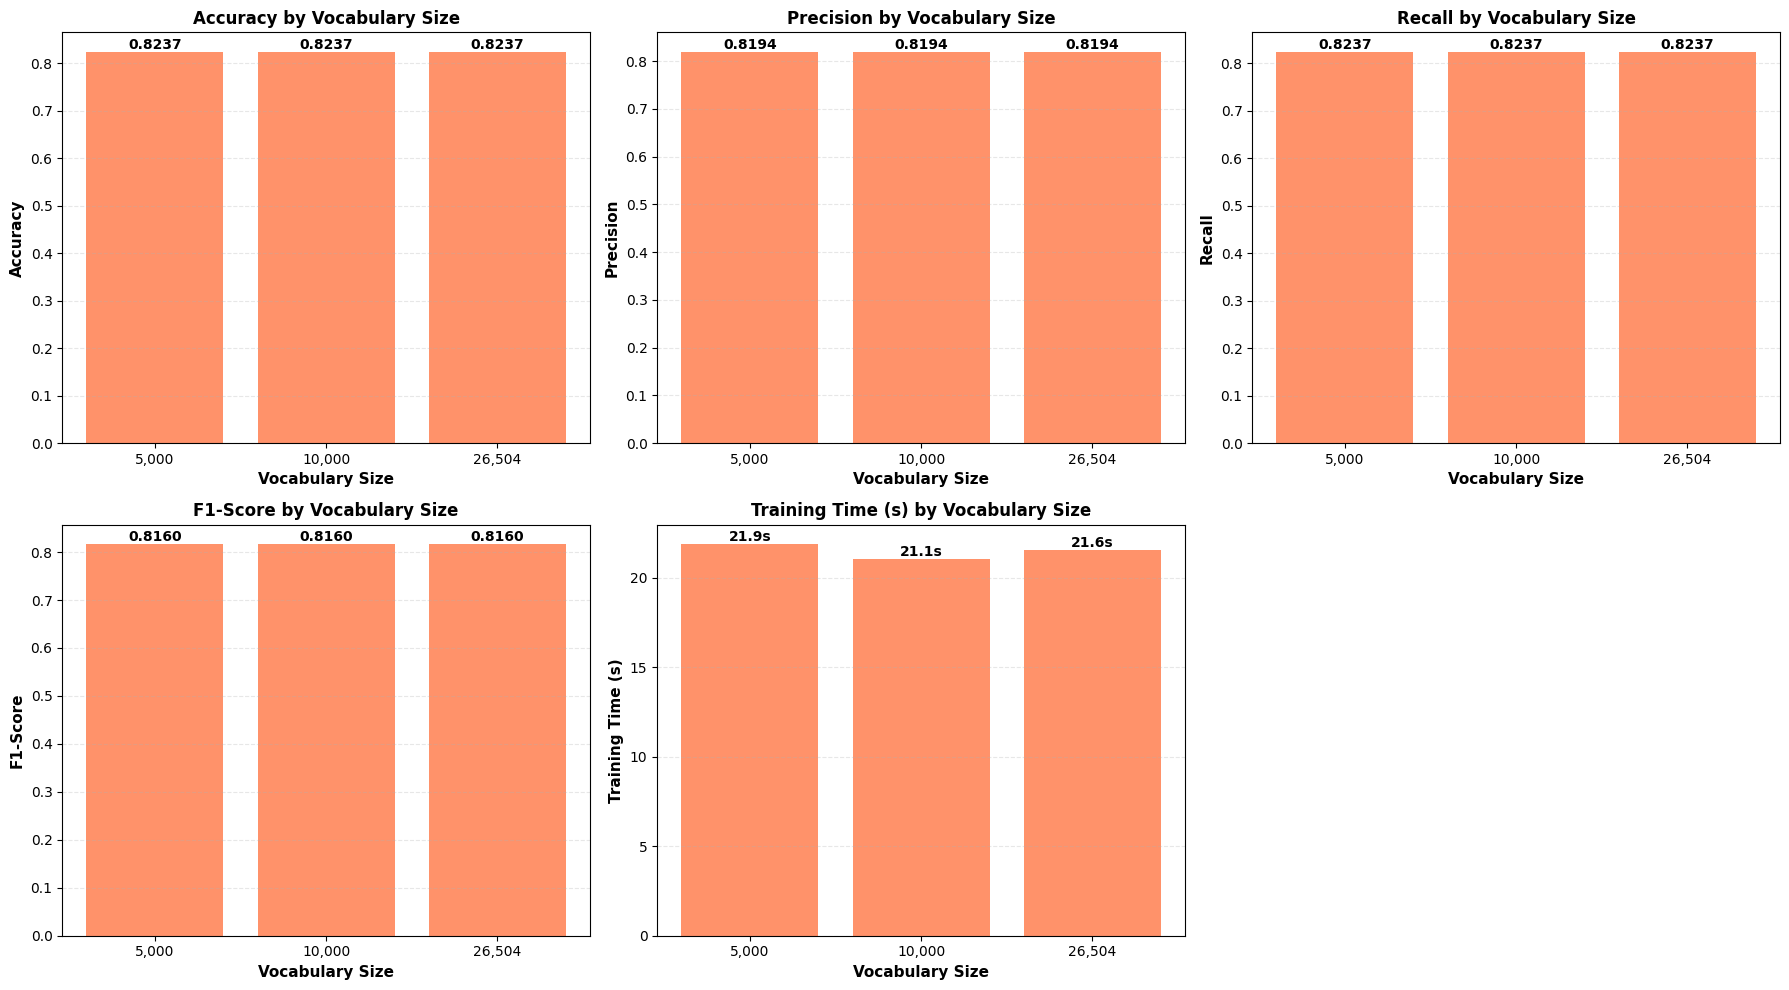

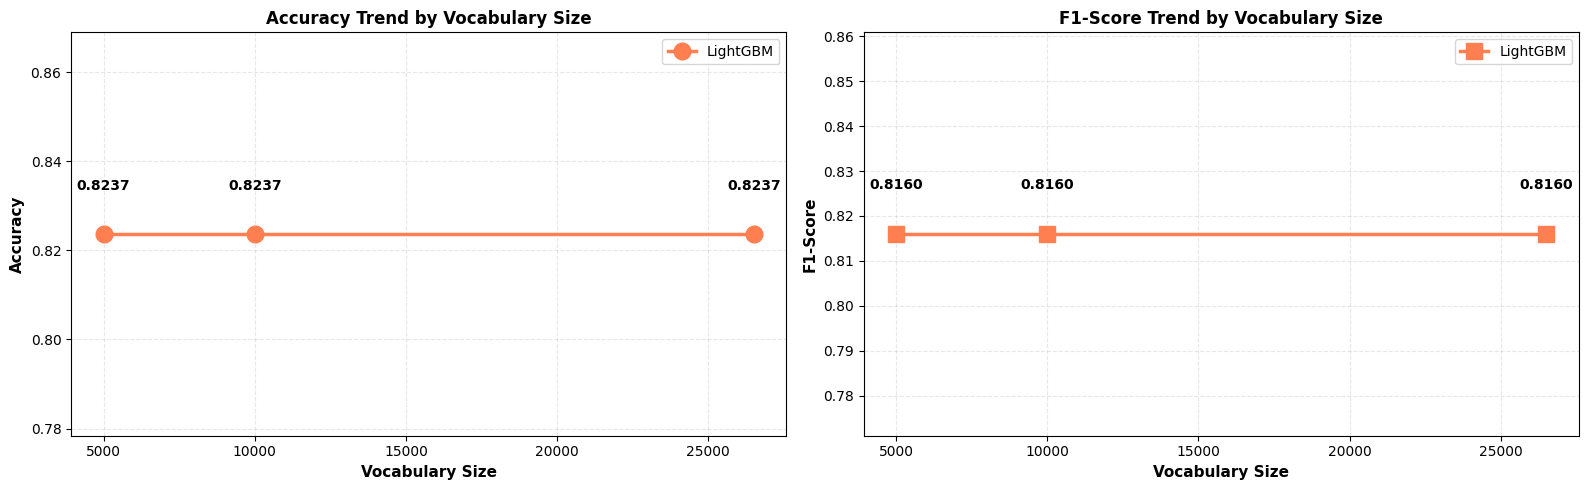


Vocabulary Size에 따른 성능 변화 분석 - LightGBM

Vocab Size:   5,000
  Accuracy:      0.8237
  F1-Score:      0.8160
  Training Time: 21.87초

Vocab Size:  10,000
  Accuracy:      0.8237
  F1-Score:      0.8160
  Training Time: 21.06초

Vocab Size:  26,504
  Accuracy:      0.8237
  F1-Score:      0.8160
  Training Time: 21.56초

성능 변화율:

  5,000 → 10,000:
    Accuracy:      +0.00%
    F1-Score:      +0.00%
    Training Time: -3.71%

  10,000 → 26,504:
    Accuracy:      +0.00%
    F1-Score:      +0.00%
    Training Time: +2.38%

LightGBM 분석 완료!

[생성된 파일]
- lgbm_performance_comparison.png
- lgbm_performance_trend.png

[LightGBM 특징]
✓ 트리 기반 앙상블 모델로 비선형 패턴 학습 가능
✓ Feature Importance로 중요한 단어 파악 가능
✓ Gradient Boosting으로 순차적 학습
✓ Sparse 데이터 처리에 효율적
✓ Early Stopping으로 과적합 방지


In [5]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import reuters
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import warnings

# 경고 메시지 숨기기
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Colab 환경)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 로딩 완료!")
print(f"LightGBM 버전: {lgb.__version__}")

# Reuters 데이터셋 로드
print("\nReuters 데이터셋 로딩 중...")
(X_train_seq, y_train), (X_test_seq, y_test) = reuters.load_data(num_words=None, test_split=0.2)

print(f"학습 데이터: {len(X_train_seq)}, 테스트 데이터: {len(X_test_seq)}")
print(f"카테고리 수: {len(np.unique(y_train))}")

num_classes = len(np.unique(y_train))

# 단어 인덱스 가져오기
word_index = reuters.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}

# 시퀀스를 텍스트로 변환하는 함수
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# 모든 데이터를 텍스트로 변환
print("\n데이터를 텍스트로 변환 중...")
X_train_text = [decode_review(seq) for seq in X_train_seq]
X_test_text = [decode_review(seq) for seq in X_test_seq]

# 카테고리 분포 확인
print("\n카테고리 분포:")
unique, counts = np.unique(y_train, return_counts=True)
category_dist = pd.DataFrame({'Category': unique, 'Count': counts})
print(category_dist.head(10))

# 결과 저장을 위한 딕셔너리
results = {
    'vocab_size': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'training_time': []
}

# 세 가지 Vocabulary Size 조건
vocab_conditions = [
    ('Top 5,000', 5000),
    ('Top 10,000', 10000),
    ('All words', None)
]

# 각 조건별로 LightGBM 모델 학습 및 평가
import time

for condition_name, max_features in vocab_conditions:
    print("\n" + "="*80)
    print(f"조건: {condition_name} 단어 사용 - LightGBM")
    print("="*80)

    # CountVectorizer 생성
    vectorizer = CountVectorizer(max_features=max_features, dtype=np.float32)

    # 벡터화
    X_train_counts = vectorizer.fit_transform(X_train_text)
    X_test_counts = vectorizer.transform(X_test_text)

    actual_vocab_size = len(vectorizer.vocabulary_)
    print(f"실제 Vocabulary Size: {actual_vocab_size:,}")
    print(f"학습 데이터 shape: {X_train_counts.shape}")
    print(f"테스트 데이터 shape: {X_test_counts.shape}")
    print(f"데이터 타입: {X_train_counts.dtype}")

    # LightGBM 모델 설정
    print("\nLightGBM 모델 학습 중...")

    # LightGBM 파라미터 설정
    params = {
        'objective': 'multiclass',
        'num_class': num_classes,
        'metric': 'multi_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': -1,  # -1로 변경하여 모든 메시지 숨김
        'max_depth': -1,
        'min_child_samples': 20,
        'reg_alpha': 0.1,
        'reg_lambda': 0.1,
        'min_split_gain': 0.0,  # 추가: split gain 경고 방지
        'min_child_weight': 0.001  # 추가: child weight 경고 방지
    }

    # LightGBM Dataset 생성
    lgb_train = lgb.Dataset(X_train_counts, label=y_train)
    lgb_test = lgb.Dataset(X_test_counts, label=y_test, reference=lgb_train)

    # 학습 시작 시간 기록
    start_time = time.time()

    # 모델 학습
    import logging
    logging.getLogger('lightgbm').setLevel(logging.ERROR)  # LightGBM 로거 레벨 설정

    lgb_model = lgb.train(
        params,
        lgb_train,
        num_boost_round=200,
        valid_sets=[lgb_train, lgb_test],
        valid_names=['train', 'test'],
        callbacks=[
            lgb.early_stopping(stopping_rounds=20, verbose=False),
            lgb.log_evaluation(period=0)  # 0으로 설정하여 evaluation 로그도 숨김
        ]
    )

    # 학습 시간 계산
    training_time = time.time() - start_time
    print(f"\n학습 완료! (소요 시간: {training_time:.2f}초)")
    print(f"Best iteration: {lgb_model.best_iteration}")

    # 예측
    y_pred_probs = lgb_model.predict(X_test_counts, num_iteration=lgb_model.best_iteration)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # 성능 평가
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n✅ Accuracy: {acc:.4f}")
    print(f"✅ F1-Score (weighted): {f1:.4f}")

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    print("\nClassification Report (상위 5개 카테고리):")
    top_categories = unique[np.argsort(counts)[-5:]]
    for cat in top_categories:
        if str(cat) in report:
            print(f"  Category {cat}: precision={report[str(cat)]['precision']:.3f}, "
                  f"recall={report[str(cat)]['recall']:.3f}, "
                  f"f1={report[str(cat)]['f1-score']:.3f}")

    # 결과 저장
    results['vocab_size'].append(actual_vocab_size)
    results['accuracy'].append(acc)
    results['precision'].append(report['weighted avg']['precision'])
    results['recall'].append(report['weighted avg']['recall'])
    results['f1_score'].append(report['weighted avg']['f1-score'])
    results['training_time'].append(training_time)

    # Feature Importance 시각화 (상위 20개)
    print("\nFeature Importance 계산 중...")
    feature_importance = lgb_model.feature_importance(importance_type='gain')
    feature_names = vectorizer.get_feature_names_out()

    # 상위 20개 중요 특성
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False).head(20)

    plt.figure(figsize=(12, 6))
    plt.barh(range(len(importance_df)), importance_df['importance'].values, color='skyblue')
    plt.yticks(range(len(importance_df)), importance_df['feature'].values)
    plt.xlabel('Importance (Gain)', fontsize=11, fontweight='bold')
    plt.ylabel('Features (Words)', fontsize=11, fontweight='bold')
    plt.title(f'Top 20 Feature Importance - {condition_name}', fontsize=12, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Confusion Matrix (상위 10개 카테고리)
    print("\nConfusion Matrix 생성 중...")
    top_10_cats = unique[np.argsort(counts)[-10:]]
    mask_test = np.isin(y_test, top_10_cats)

    y_test_filtered = y_test[mask_test]
    y_pred_filtered = y_pred[mask_test]

    cm = confusion_matrix(y_test_filtered, y_pred_filtered, labels=top_10_cats)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
                xticklabels=top_10_cats, yticklabels=top_10_cats,
                cbar_kws={'label': 'Count'})
    plt.title(f'Confusion Matrix - LightGBM - {condition_name}\nAccuracy: {acc:.4f}',
              fontsize=12, fontweight='bold')
    plt.ylabel('Actual Category', fontsize=11)
    plt.xlabel('Predicted Category', fontsize=11)
    plt.tight_layout()
    plt.show()

# 결과 DataFrame 생성
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("전체 결과 요약 - LightGBM")
print("="*80)
print(results_df.to_string(index=False))

# 성능 비교 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'training_time']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time (s)']

for idx, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
    if idx < 5:
        ax = axes[idx // 3, idx % 3]

        x = np.arange(len(results_df))
        bars = ax.bar(x, results_df[metric].values, color='coral', alpha=0.85)

        ax.set_xlabel('Vocabulary Size', fontsize=11, fontweight='bold')
        ax.set_ylabel(metric_name, fontsize=11, fontweight='bold')
        ax.set_title(f'{metric_name} by Vocabulary Size', fontsize=12, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels([f'{int(v):,}' for v in results_df['vocab_size'].values])
        ax.grid(axis='y', alpha=0.3, linestyle='--')

        # 값 표시
        for bar in bars:
            height = bar.get_height()
            if metric == 'training_time':
                label = f'{height:.1f}s'
            else:
                label = f'{height:.4f}'
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   label, ha='center', va='bottom', fontsize=10, fontweight='bold')

# 빈 subplot 제거
axes[1, 2].axis('off')

plt.tight_layout()
plt.savefig('lgbm_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 성능 추이 그래프
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Accuracy 추이
axes[0].plot(results_df['vocab_size'], results_df['accuracy'],
             marker='o', linewidth=2.5, markersize=12, color='coral', label='LightGBM')
axes[0].set_xlabel('Vocabulary Size', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=11, fontweight='bold')
axes[0].set_title('Accuracy Trend by Vocabulary Size', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')

# 값 표시
for i, (x, y) in enumerate(zip(results_df['vocab_size'], results_df['accuracy'])):
    axes[0].text(x, y + 0.01, f'{y:.4f}', ha='center', fontsize=10, fontweight='bold')

# F1-Score 추이
axes[1].plot(results_df['vocab_size'], results_df['f1_score'],
             marker='s', linewidth=2.5, markersize=12, color='coral', label='LightGBM')
axes[1].set_xlabel('Vocabulary Size', fontsize=11, fontweight='bold')
axes[1].set_ylabel('F1-Score', fontsize=11, fontweight='bold')
axes[1].set_title('F1-Score Trend by Vocabulary Size', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')

# 값 표시
for i, (x, y) in enumerate(zip(results_df['vocab_size'], results_df['f1_score'])):
    axes[1].text(x, y + 0.01, f'{y:.4f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('lgbm_performance_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# Vocabulary Size에 따른 성능 변화 분석
print("\n" + "="*80)
print("Vocabulary Size에 따른 성능 변화 분석 - LightGBM")
print("="*80)

vocab_sizes = results_df['vocab_size'].values
accuracies = results_df['accuracy'].values
f1_scores = results_df['f1_score'].values
training_times = results_df['training_time'].values

for i in range(len(vocab_sizes)):
    print(f"\nVocab Size: {vocab_sizes[i]:>7,}")
    print(f"  Accuracy:      {accuracies[i]:.4f}")
    print(f"  F1-Score:      {f1_scores[i]:.4f}")
    print(f"  Training Time: {training_times[i]:.2f}초")

if len(accuracies) > 1:
    print(f"\n성능 변화율:")
    for i in range(1, len(accuracies)):
        acc_change = ((accuracies[i] - accuracies[i-1]) / accuracies[i-1] * 100)
        f1_change = ((f1_scores[i] - f1_scores[i-1]) / f1_scores[i-1] * 100)
        time_change = ((training_times[i] - training_times[i-1]) / training_times[i-1] * 100)
        print(f"\n  {vocab_sizes[i-1]:,} → {vocab_sizes[i]:,}:")
        print(f"    Accuracy:      {acc_change:+.2f}%")
        print(f"    F1-Score:      {f1_change:+.2f}%")
        print(f"    Training Time: {time_change:+.2f}%")

print("\n" + "="*80)
print("LightGBM 분석 완료!")
print("="*80)
print("\n[생성된 파일]")
print("- lgbm_performance_comparison.png")
print("- lgbm_performance_trend.png")

print("\n[LightGBM 특징]")
print("✓ 트리 기반 앙상블 모델로 비선형 패턴 학습 가능")
print("✓ Feature Importance로 중요한 단어 파악 가능")
print("✓ Gradient Boosting으로 순차적 학습")
print("✓ Sparse 데이터 처리에 효율적")
print("✓ Early Stopping으로 과적합 방지")